<a href="https://colab.research.google.com/github/Ryzon3/csci_6967/blob/main/homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **Advanced Objective Function and Use Case**

## **Part one**

#### **MLE Deriviation**
First let us note that $\hat{y}_i=\sigma (w^\top x_i)=P(y_i=1 \mid x_i, w)$. Knowing properties of the sigmoid function we can then see that $P(y_i=0 \mid x_i, w) = 1 - P(y_i=1 \mid x_i, w) = 1 - \sigma (w^\top x_i)$. Since we are using maximum likelihood estimation we can then find the best $w$ by maximizing the likelhood as follows: $$
\hat{\mathbf{w}}_{MLE} = \arg\max_\mathbf{w} \prod_{i=1}^N P(\hat{y_i} = y_i \mid x_i, \mathbf{w}) = \arg\max_{\mathbf{w}}
\prod_{i=1}^N
\Bigl[\sigma\bigl(\mathbf{w}^\top \mathbf{x}_i\bigr)\Bigr]^{y_i}
\Bigl[1 - \sigma\bigl(\mathbf{w}^\top \mathbf{x}_i\bigr)\Bigr]^{(1-y_i)}
$$
We can then take the natural log of this to get:
$$\hat{\mathbf{w}}_{MLE}  = \arg\max_{\mathbf{w}}
\sum_{i=1}^N
\Bigl[
y_i \log \sigma\bigl(\mathbf{w}^\top \mathbf{x}_i\bigr)
+ (1-y_i) \log\bigl(1 - \sigma\bigl(\mathbf{w}^\top \mathbf{x}_i\bigr)\bigr)
\Bigr]
$$
Lastly we can define:
$$
NLL = - \sum_{i=1}^N
\Bigl[
y_i \log \sigma\bigl(\mathbf{w}^\top \mathbf{x}_i\bigr)
+ (1-y_i) \log\bigl(1 - \sigma\bigl(\mathbf{w}^\top \mathbf{x}_i\bigr)\bigr)
\Bigr]
$$
Thus we can find $\mathbf{w}$ by minimizing $NLL$. Therefore our objective function to minimize is the $NLL$.\
#### **MAP VS MLE**
MAP offers a compelling alternative for logistic regression by integrating prior knowledge into the model. This incorporation provides intrinsic regularization, which enhances the model's robustness and helps prevent overfitting. However, adding prior information also increases the complexity of the estimation process, making the technique more computationally intensive and potentially requiring more time to converge to a solution. Overall, while MAP makes the model more stable and reliable, it may demand additional computational resources compared to MLE\
Sources for MAP and MLE: [MLE vs MAP article](https://sassafras13.github.io/MLEvsMAP//), [Stack exchange post for intuition](https://datascience.stackexchange.com/questions/81811/what-is-the-difference-between-maximum-likelihood-hypothesis-and-maximum-a-poste)

## **Part two**
We want to predict whether students are likely to cheat based on features such as their past assignment grades, cumulative GPA, recent test scores, and class attendance records. Our fake dataset includes labels where students have been previously identified as cheaters (1) or non-cheaters (0). We can first see that this problem is simple and explainability would matter so overly large deep classifiers would be silly here. Logistic Regression is then a natural choice here because it outputs a probability of cheating, making it straightforward to set a threshold for classification. This would then yield a binary response. In contrast, Linear Regression typically works better for continuous outcomes than strictly binary events, and would likely yield unbounded values. This means that a logisitc regression model is a very solid choice.

## **Part three**
In our input dataset each previous studen that we have data on would correspond to an index $i$. The features would then be stored in a vector $\mathbf{x}_i$ with a corresponding label $y_i$ if they have cheated. Therefore the probability of a student cheating would be $P(y_i=1 \mid \mathbf{x}_i, \mathbf{w})$. Thus on a new student that we only know the features of we can thus predict $\hat{y}$ which will be a flag for if they are likely to cheat or not. In our above deriviation we thus assumed that the students sampled in our dataset were independent and identically distributed. Our model also assumes that we can model this relationship linearly through $\mathbf{w}\mathbf{x}_i$. Lastly we assume that the historical cheater data and labels would be correct.


# 2. **Dataset and Advanced EDA**

For this question I am going to use [Pumpkin seed dataset](https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset) from kaggle.

Citation: KOKLU, M., SARIGIL, S., & OZBEK, O. (2021). The use of machine learning methods in classification of pumpkin seeds (Cucurbita pepo L.). Genetic Resources and Crop Evolution, 68(7), 2713-2726. Doi: https://doi.org/10.1007/s10722-021-01226-0

In [1]:
import kagglehub

# Login to kaggle
kagglehub.login()

# Download latest version
path = kagglehub.dataset_download("muratkokludataset/pumpkin-seeds-dataset")

print("Path to dataset files:", path)

100%|██████████| 393k/393k [00:00<00:00, 29.2MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/muratkokludataset/pumpkin-seeds-dataset/versions/1


Kaggle credentials set.
Kaggle credentials successfully validated.


In [95]:
# Imports and some of following code referenced from: https://github.com/Uzmamushtaque/Projects-in-Machine-Learning-and-AI/blob/main/TitanicExample.ipynb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import Normalizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

## **Exploratory Data Analysis**

In [5]:
# Load dataset and preview with colab
df = pd.read_excel(path + '/Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset.xlsx')
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [6]:
# Starting EDA, by confirming feature count
df.shape

(2500, 13)

In [7]:
# Detect missing values, note luckily I somehow picked a very nice dataset
df.isna().sum()

,0
Area,0
Perimeter,0
Major_Axis_Length,0
Minor_Axis_Length,0
Convex_Area,0
Equiv_Diameter,0
Eccentricity,0
Solidity,0
Extent,0
Roundness,0


In [8]:
# Now let's get the general info on the dataset, we can see they are all numerical except the class which is a string
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [9]:
# Since they are all numerical it's very useful to check the stats of each feature, we can note they all vary in scale for later
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


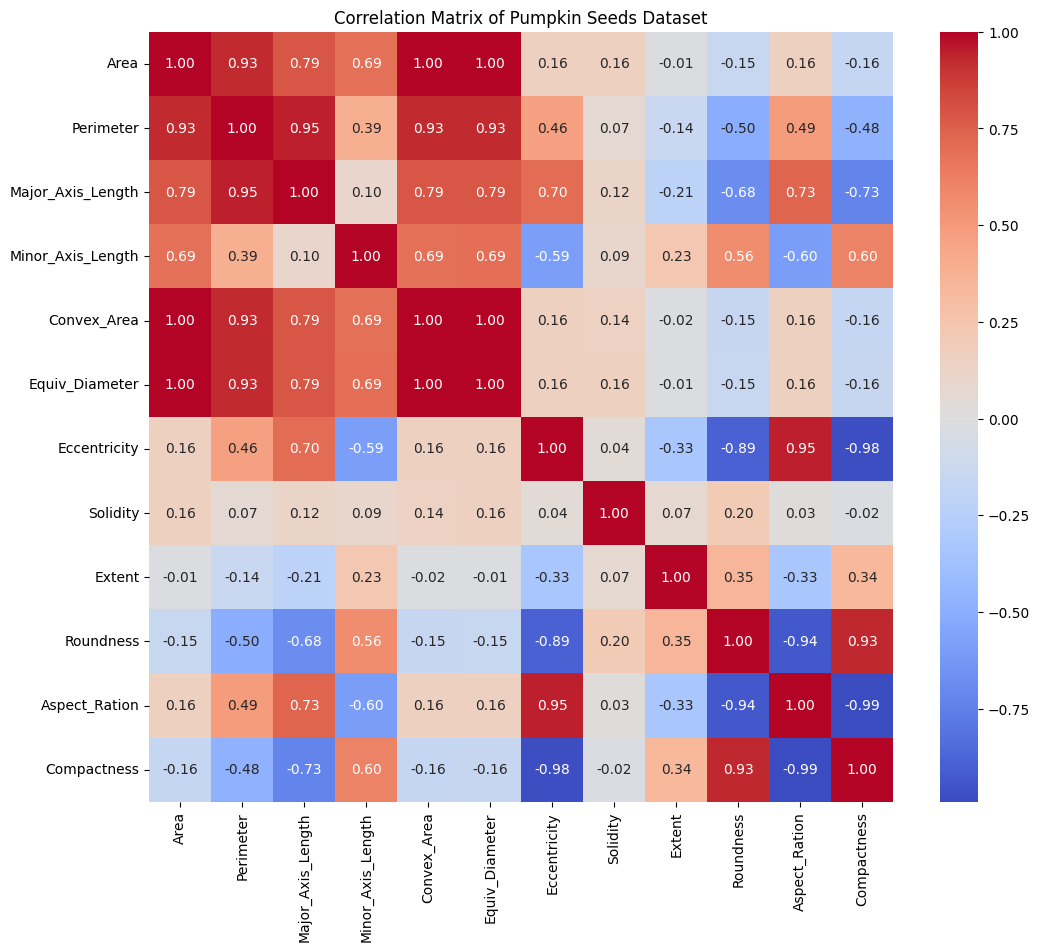

In [14]:
# Generate correlation matrix without Class
corr_matrix = df.drop('Class', axis=1).corr()

# Plotting seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Pumpkin Seeds Dataset')
plt.show()

From this correlation matrix we can see that some features are very highly correlated. We can see the whole top left of the plot is very solid red. We can maybe do some feature transformations later on on some of these highly correlated features.

In [23]:
# Now we will perform VIT to further look into this multicollinearity
X = df.drop('Class', axis=1)
X.insert(0, 'Intercept', 1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF DataFrame sorted by VIF
vif_data = vif_data[vif_data['Feature'] != 'Intercept']
vif_data = vif_data.sort_values(by='VIF', ascending=False)
vif_data

,Feature,VIF
5,Convex_Area,113660.649433
1,Area,111428.185574
2,Perimeter,5590.974866
3,Major_Axis_Length,4739.115987
6,Equiv_Diameter,3977.244529
12,Compactness,2113.141422
4,Minor_Axis_Length,1323.026576
10,Roundness,763.141484
7,Eccentricity,329.175180
11,Aspect_Ration,299.459166


We have absurdely high VIF! I am going to try to address this first by combining and removing some features. Unfortunately this is a very hard problem to address due to the nature of pumpkin seeds not having many features that don't correlate.

In [24]:
# Addressing the multicolinearlity by first dropping some features that are not needed as they are duplicates
new_df = df.drop(['Convex_Area', 'Equiv_Diameter', 'Eccentricity'], axis=1)

# Next we will combine some features that have high overlap
# First we will combine perimeter and area into a new measure called "size"
new_df['Size'] = new_df['Area'] + new_df['Perimeter']
new_df = new_df.drop(['Area', 'Perimeter'], axis=1)

# Next we combine roundness and compactness into "Dense"
new_df['Dense'] = new_df['Compactness'] + new_df['Roundness']
new_df = new_df.drop(['Compactness', 'Roundness'], axis=1)

# Lastly we rerun VIF to see if it improves
X = new_df.drop('Class', axis=1)
X.insert(0, 'Intercept', 1)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF DataFrame sorted by VIF
vif_data = vif_data[vif_data['Feature'] != 'Intercept']
vif_data = vif_data.sort_values(by='VIF', ascending=False)
vif_data

,Feature,VIF
1,Major_Axis_Length,298.466651
6,Size,268.839032
5,Aspect_Ration,108.953211
2,Minor_Axis_Length,87.112754
7,Dense,43.371124
3,Solidity,1.794967
4,Extent,1.148827


This new VIF loooks more manageable. Sadly size is made of major and minor axis and so is aspect ratio but this liekly the best we can get

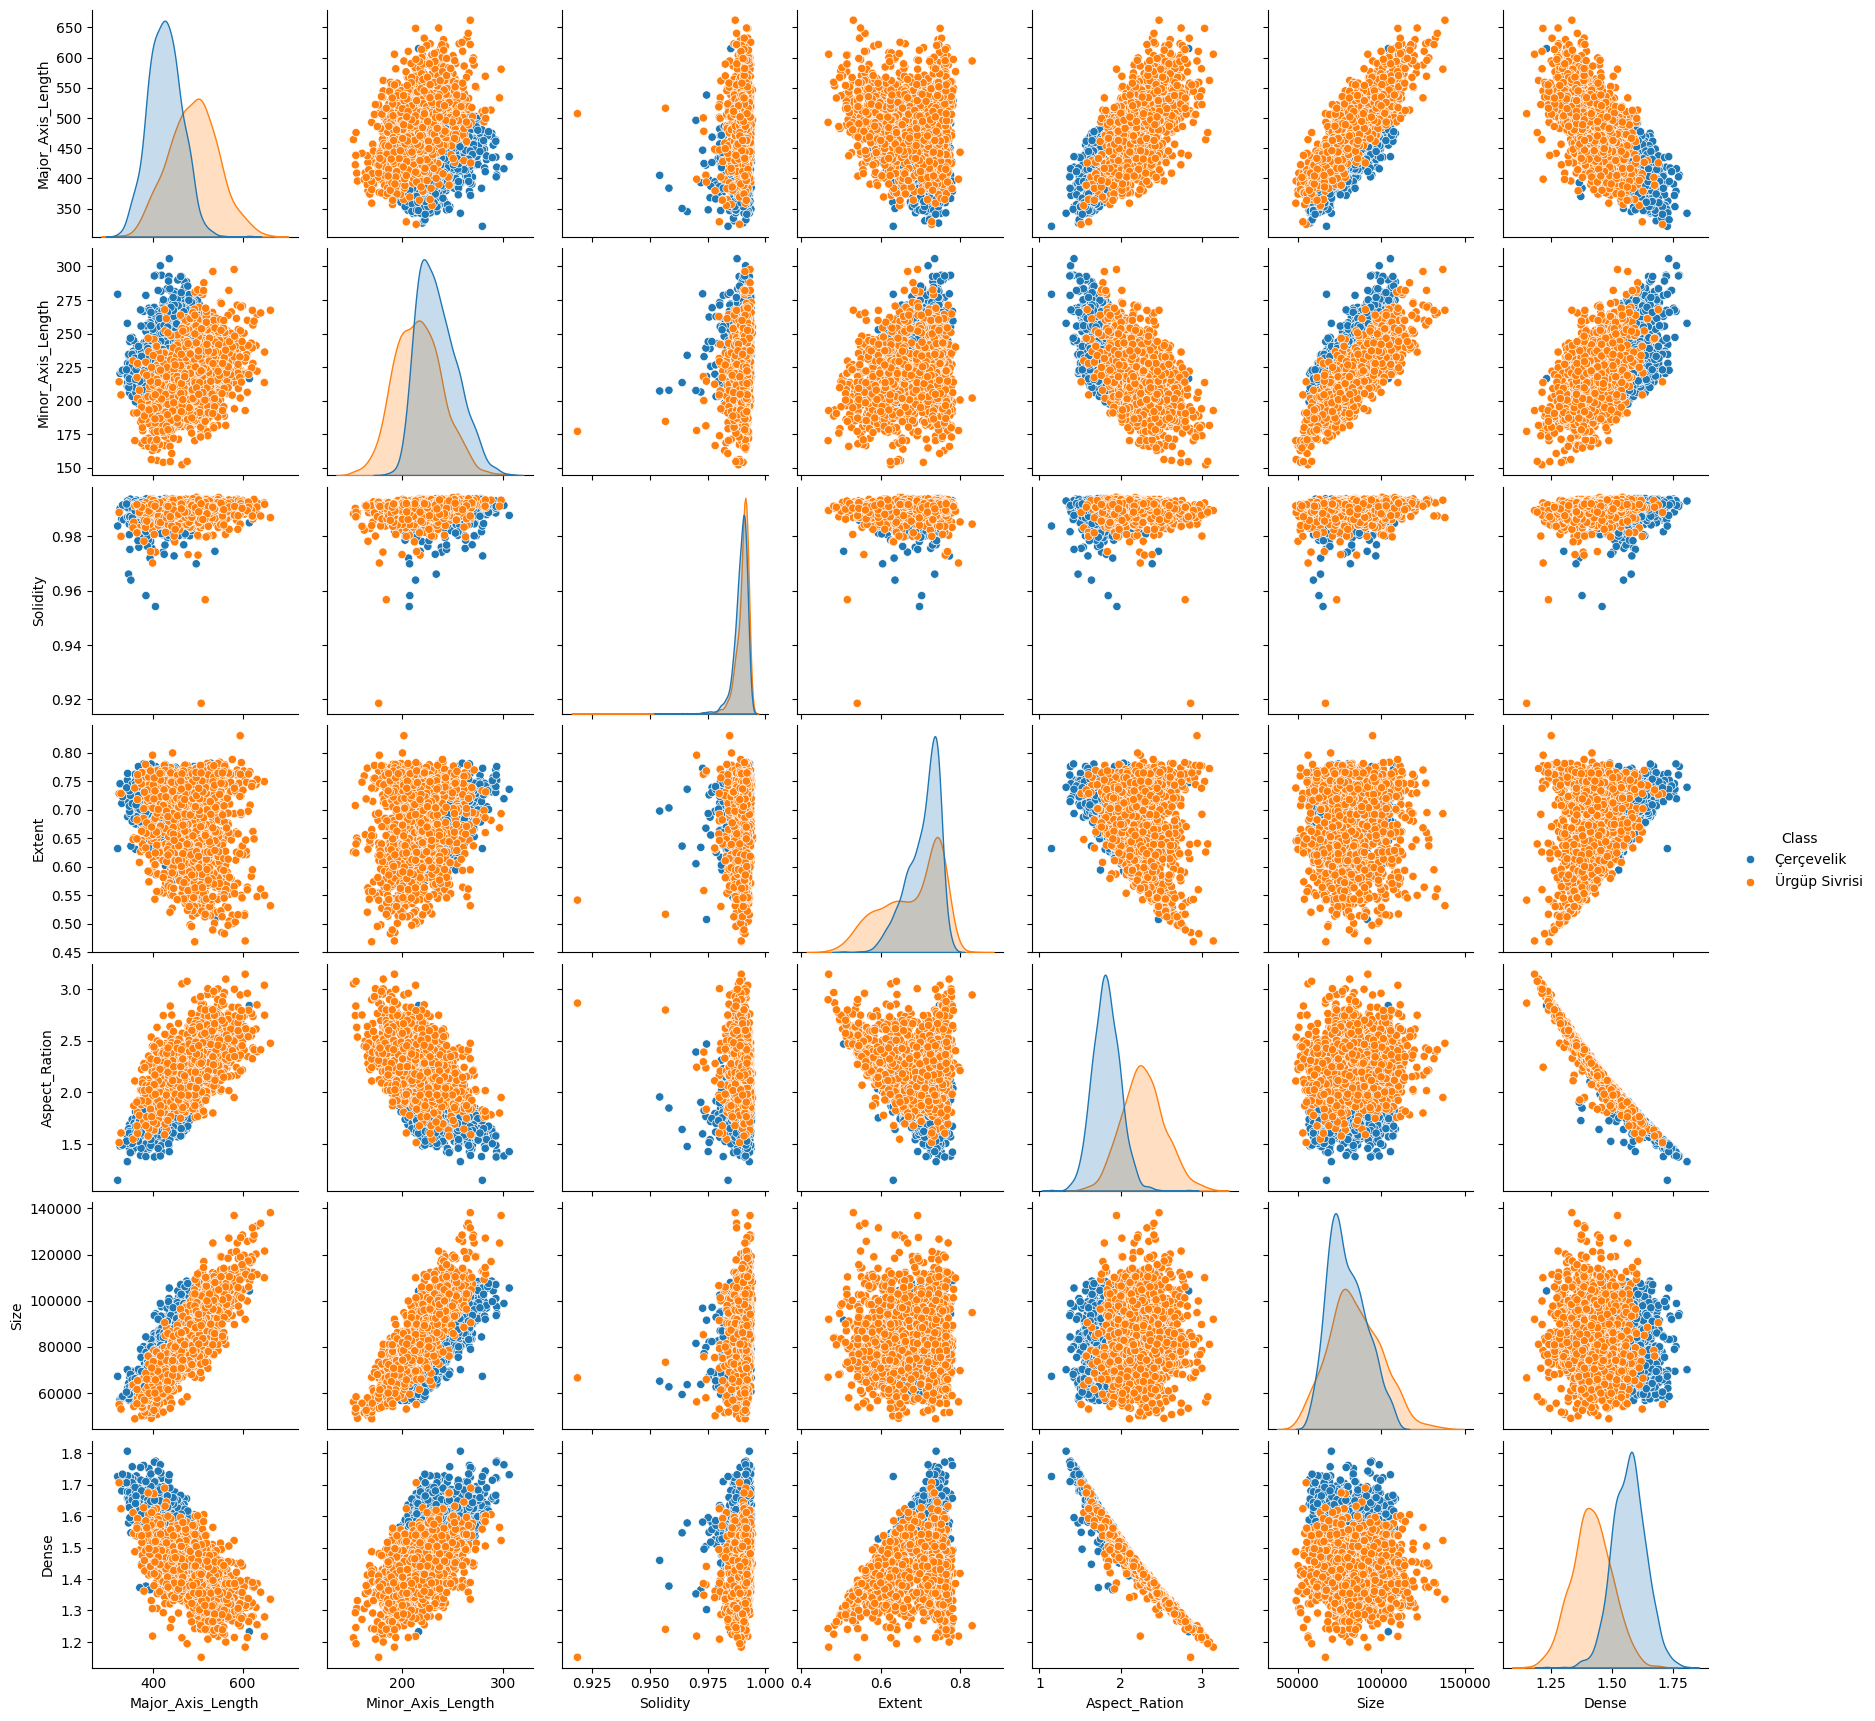

In [28]:
# Alright now we will use a pairplot to get a preview of how seperable the features look, let's use kde as well
sns.pairplot(new_df, hue="Class", diag_kind="kde")

<Figure size 1600x1400 with 0 Axes>

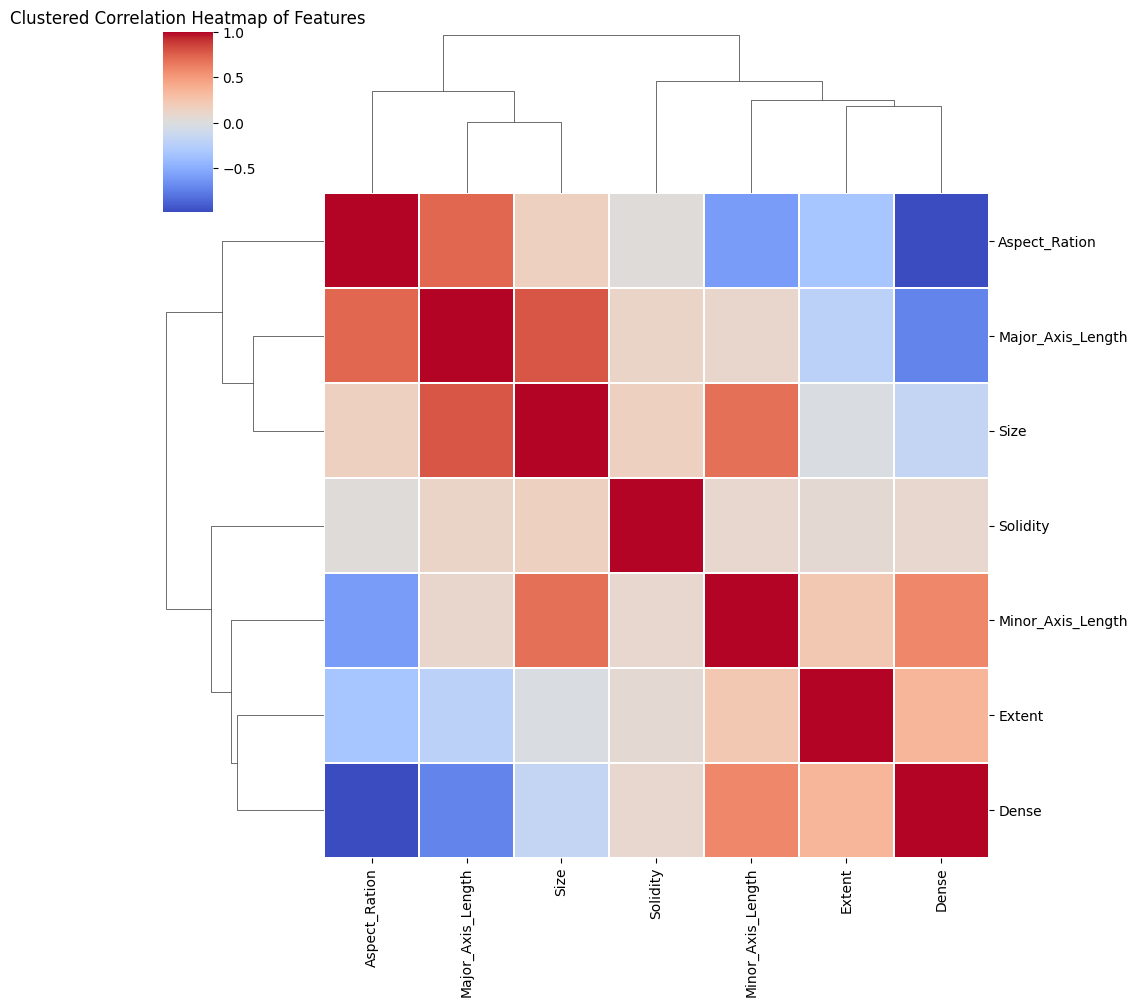

In [31]:
# Lastly let's test heat maps with clustering to get a good last look
X = new_df.drop('Class', axis=1)

# Compute the correlation matrix
corr_matrix = X.corr()

# Generate a clustered heatmap
plt.figure(figsize=(16, 14))
sns.clustermap(corr_matrix, method='average', cmap='coolwarm', annot=False, linewidths=.1)

plt.title('Clustered Correlation Heatmap of Features')
plt.show()

Looking at the pairplots and clustering the data seems somewhat seperable on some features but overall looks quite hard to fit a model to. We seem to have some hope.

In [80]:
# Now we can move on to make the data usable for the next question

# independent variables
X = new_df.drop(['Class'], axis=1)
# Convert Y categorical to 0 and 1 then print which one is 1 and 0
classes = new_df['Class'].unique()
class_mapping = {classes[0]: 0, classes[1]: 1}
print("Class mapping:", class_mapping)

# Apply the mapping
new_df['class_num'] = new_df['Class'].map(class_mapping)
# dependent/target variable
y = new_df.class_num
# divide data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# scale the data between 0 and 1
transformer = Normalizer(norm='max').fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

Class mapping: {'Çerçevelik': 0, 'Ürgüp Sivrisi': 1}


# 3. **Logistic Regression Implementation**

We will start with the implementation in the below code block.

In [34]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def compute_cost(y, y_hat):
    return np.mean(-(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat)))

def gradient_descent(X, y, w, b, lr, tot_iter):
    prev_costs = []
    N = X.shape[0]

    for i in range(tot_iter):
        y_hat = sigmoid(np.dot(X, w) + b)
        cost = compute_cost(y, y_hat)

        dw = np.dot(X.T, (y_hat - y)) / N
        db = np.sum(y_hat - y) / N

        w -= lr * dw
        b -= lr * db

        prev_costs.append(cost)

    return w, b, prev_costs

def predict(X, w, b, threshold=None):
    y_hat = sigmoid(np.dot(X, w) + b)
    if threshold is not None:
        y_hat = np.where(y_hat >= threshold, 1, 0)
    return y_hat

In [81]:
# Initialize parameters
n_features = X_train.shape[1]
w = np.zeros(n_features)
b = 0
learning_rate = 0.01
num_iterations = 1000
w, b, cost_history = gradient_descent(X_train, y_train, w, b, learning_rate, num_iterations)

y_pred = predict(X_train, w, b, threshold=0.5)
accuracy = np.mean(y_pred == y_train)
print("Train accuracy:", accuracy)
y_pred = predict(X_test, w, b, threshold=0.5)
accuracy = np.mean(y_pred == y_test)
print("Test accuracy:", accuracy)

# SANITY CHECK TO SEE IF I AM THE PROBLEM OR IF THIS DATASET IS HARD
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_train)
accuracy = np.mean(y_pred == y_train)
print("Train accuracy (sklearn sanity check):", accuracy)
y_pred = logreg.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print("Test accuracy (sklearn sanity check):", accuracy)

Train accuracy: 0.5175
Test accuracy: 0.53
Train accuracy (sklearn sanity check): 0.5175
Test accuracy (sklearn sanity check): 0.53


Okay a little reflection. This dataset and problem looks way harder than I thought it would be, I was worried I just implemented gradient descent wrong somehow so I check with SKLearn. Turns out this dataset is very difficult for logisitic regression. In the future maybe I should choose an easier dataset? At least I am going to see if I can get a decent classification by the end of this homework.\
Moving onto the next part I have already implemented batch gradient
descent. I will now write  a quick function for the other two and we can compare all 3.

In [70]:
def mini_batch_gradient_descent(X, y, w, b, lr, tot_iter, batch_size):
    prev_costs = []
    N = X.shape[0]
    # Ensure y is a np vector
    y = np.array(y)

    for i in range(tot_iter):
        indices = np.random.choice(N, batch_size, replace=False)
        X_batch = X[indices]
        y_batch = y[indices]

        y_hat = sigmoid(np.dot(X_batch, w) + b)
        cost = compute_cost(y_batch, y_hat)

        dw = np.dot(X_batch.T, (y_hat - y_batch)) / batch_size
        db = np.sum(y_hat - y_batch) / batch_size

        w -= lr * dw
        b -= lr * db

        prev_costs.append(cost)

    return w, b, prev_costs

In [77]:
# Init parameters
n_features = X_train.shape[1]
w_batch = np.zeros(n_features)
b_batch = 0
w_mini = np.zeros(n_features)
b_mini = 0
w_stoch = np.zeros(n_features)
b_stoch = 0
learning_rate = 0.01
num_iterations = 1000
data_set_size = X_train.shape[0]

# Now try all 3 methods together
w_batch, b_batch, cost_history = gradient_descent(X_train, y_train, w_batch, b_batch, learning_rate, num_iterations)
num_iter_mini = int(num_iterations * data_set_size / 10)
w_mini, b_mini, cost_history = mini_batch_gradient_descent(X_train, y_train, w_mini, b_mini, learning_rate, num_iter_mini, 10)
num_iter_stoch = int(num_iterations * data_set_size)
w_stoch, b_stoch, cost_history = mini_batch_gradient_descent(X_train, y_train, w_stoch, b_stoch, learning_rate, num_iter_stoch, 1)

# Test each method
y_pred = predict(X_test, w_batch, b_batch, threshold=0.5)
accuracy = np.mean(y_pred == y_test)
print("Batch test accuracy:", accuracy)
y_pred = predict(X_test, w_mini, b_mini, threshold=0.5)
accuracy = np.mean(y_pred == y_test)
print("Mini-batch test accuracy:", accuracy)
y_pred = predict(X_test, w_stoch, b_stoch, threshold=0.5)
accuracy = np.mean(y_pred == y_test)
print("Stochastic test accuracy:", accuracy)

Batch test accuracy: 0.53
Mini-batch test accuracy: 0.53
Stochastic test accuracy: 0.53


Sadly once again due to this hard dataset none of the algorithms improve the accuracy. I tried pushing them all with equal iterations but they all just seem to guess the majority class. I did test the convergence speeds (not shown here just tinkered with iteration count) to help inform my next part.\
BGD computes gradients using the entire dataset each iteration, leading to a smooth and consistent decrease in the cost function but with slower convergence. SGD updates parameters using one data point at a time, causing the cost function to fluctuate but enabling faster, convergence. MBGD strikes a balance by using small batches for each update, resulting in a more stable and efficient reduction of the cost function compared to SGD, while converging faster than BGD. This makes MBGD generally more effective for optimizing the cost function in large-scale problems.

In [90]:
def gradient_descent_optimizer(X, y, w, b, lr, tot_iter, optimizer='momentum', beta1=0.9, beta2=0.999, epsilon=1e-8, batch_size=32):
    prev_costs = []
    m_w, v_w = np.zeros_like(w), np.zeros_like(w)
    m_b, v_b = 0, 0

    for i in range(1, tot_iter + 1):
        y_hat = sigmoid(np.dot(X, w) + b)
        cost = compute_cost(y, y_hat)
        prev_costs.append(cost)

        dw = np.dot(X.T, (y_hat - y)) / X.shape[0]
        db = np.sum(y_hat - y) / X.shape[0]

        if optimizer == 'momentum':
            m_w = beta1 * m_w + (1 - beta1) * dw
            m_b = beta1 * m_b + (1 - beta1) * db
            w -= lr * m_w
            b -= lr * m_b
        elif optimizer == 'rmsprop':
            v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)
            v_b = beta2 * v_b + (1 - beta2) * (db ** 2)
            w -= lr * dw / (np.sqrt(v_w) + epsilon)
            b -= lr * db / (np.sqrt(v_b) + epsilon)
        elif optimizer == 'adam':
            m_w = beta1 * m_w + (1 - beta1) * dw
            m_b = beta1 * m_b + (1 - beta1) * db
            v_w = beta2 * v_w + (1 - beta2) * (dw ** 2)
            v_b = beta2 * v_b + (1 - beta2) * (db ** 2)
            m_w_corr = m_w / (1 - beta1 ** i)
            m_b_corr = m_b / (1 - beta1 ** i)
            v_w_corr = v_w / (1 - beta2 ** i)
            v_b_corr = v_b / (1 - beta2 ** i)
            w -= lr * m_w_corr / (np.sqrt(v_w_corr) + epsilon)
            b -= lr * m_b_corr / (np.sqrt(v_b_corr) + epsilon)
        else:
            w -= lr * dw
            b -= lr * db

    return w, b, prev_costs

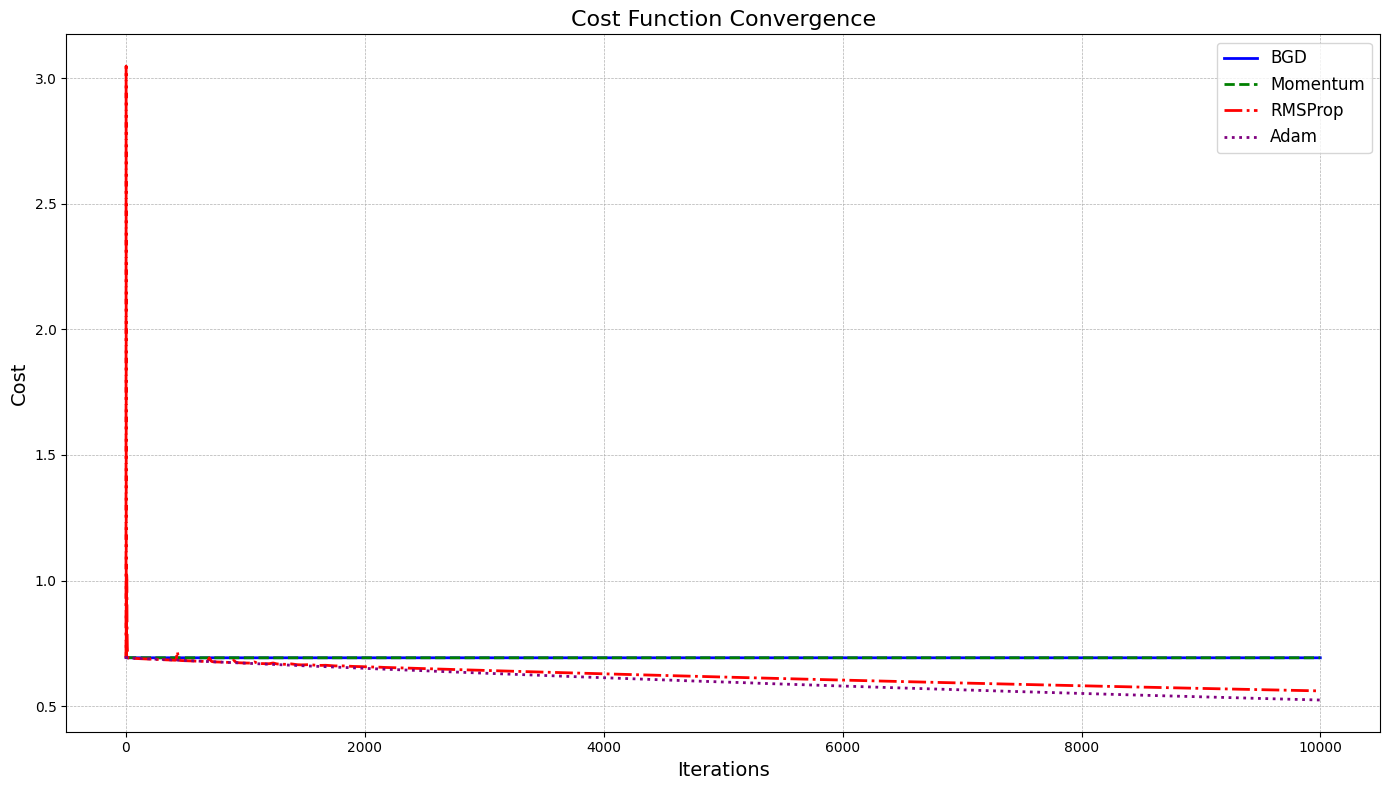

BGD Test Accuracy: 53.00%
Momentum Test Accuracy: 53.00%
RMSProp Test Accuracy: 80.40%
Adam Test Accuracy: 79.20%


In [99]:
# Initialize parameters
n_features = X_train.shape[1]
learning_rate = 0.1
num_iterations = 10000

# Initialize weights and bias for each optimizer
w_bgd, b_bgd = np.zeros(n_features), 0
w_momentum, b_momentum = np.zeros(n_features), 0
w_rmsprop, b_rmsprop = np.zeros(n_features), 0
w_adam, b_adam = np.zeros(n_features), 0

# Train using BGD
w_bgd, b_bgd, cost_bgd = gradient_descent_optimizer(X_train, y_train, w_bgd, b_bgd, learning_rate, num_iterations, optimizer='vanilla')

# Train using Momentum
w_momentum, b_momentum, cost_momentum = gradient_descent_optimizer(X_train, y_train, w_momentum, b_momentum, learning_rate, num_iterations, optimizer='momentum')

# Train using RMSProp
w_rmsprop, b_rmsprop, cost_rmsprop = gradient_descent_optimizer(X_train, y_train, w_rmsprop, b_rmsprop, learning_rate, num_iterations, optimizer='rmsprop')

# Train using Adam
w_adam, b_adam, cost_adam = gradient_descent_optimizer(X_train, y_train, w_adam, b_adam, learning_rate, num_iterations, optimizer='adam')

# Plot Cost Convergence
plt.figure(figsize=(14, 8))

plt.plot(cost_bgd, label='BGD', color='blue', linewidth=2, linestyle='-')
plt.plot(cost_momentum, label='Momentum', color='green', linewidth=2, linestyle='--')
plt.plot(cost_rmsprop, label='RMSProp', color='red', linewidth=2, linestyle='-.')
plt.plot(cost_adam, label='Adam', color='purple', linewidth=2, linestyle=':')

plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Cost', fontsize=14)
plt.title('Cost Function Convergence', fontsize=16)

plt.legend(fontsize=12, loc='upper right')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

# Prediction and Evaluation
def evaluate(X, y, w, b, method):
    y_pred = predict(X, w, b, 0.5)
    accuracy = np.mean(y_pred == y)
    print(f"{method} Test Accuracy: {accuracy * 100:.2f}%")

evaluate(X_test, y_test, w_bgd, b_bgd, "BGD")
evaluate(X_test, y_test, w_momentum, b_momentum, "Momentum")
evaluate(X_test, y_test, w_rmsprop, b_rmsprop, "RMSProp")
evaluate(X_test, y_test, w_adam, b_adam, "Adam")

Initial reaction to these are WOW, both RMSProp and Adam significantly improved (and made it finally converge) logistic regression. I didn't even tune the parameters that much and they really improved. Let's take a deeper dive at the results below

In [100]:
def evaluate_model(X, y, w, b, method):
    y_pred = predict(X, w, b, 0.5)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, zero_division=0)
    recall = recall_score(y, y_pred, zero_division=0)
    f1 = f1_score(y, y_pred, zero_division=0)
    print(f"{method} Test Accuracy: {accuracy * 100:.2f}%")
    print(f"{method} Precision: {precision:.2f}")
    print(f"{method} Recall: {recall:.2f}")
    print(f"{method} F1 Score: {f1:.2f}\n")

evaluate_model(X_test, y_test, w_bgd, b_bgd, "BGD")
evaluate_model(X_test, y_test, w_momentum, b_momentum, "Momentum")
evaluate_model(X_test, y_test, w_rmsprop, b_rmsprop, "RMSProp")
evaluate_model(X_test, y_test, w_adam, b_adam, "Adam")


BGD Test Accuracy: 53.00%
BGD Precision: 0.00
BGD Recall: 0.00
BGD F1 Score: 0.00

Momentum Test Accuracy: 53.00%
Momentum Precision: 0.00
Momentum Recall: 0.00
Momentum F1 Score: 0.00

RMSProp Test Accuracy: 80.40%
RMSProp Precision: 0.80
RMSProp Recall: 0.78
RMSProp F1 Score: 0.79

Adam Test Accuracy: 79.20%
Adam Precision: 0.84
Adam Recall: 0.69
Adam F1 Score: 0.76



he evaluation reveals that both Batch Gradient Descent and Momentum optimizers struggled with the challenging dataset, each achieving only around 53% accuracy and failing to correctly identify any positive instances, as indicated by zero precision, recall, and F1 scores. This means they just predicted the majority class each instance. In contrast, RMSProp and Adam optimizers performed significantly better, attaining accuracies of 80.4% and 79.2%, respectively. Both optimizers had solid precision and recall as well meaning we are not lacking in any department.\
Next for hyperparameter tuning I didn't find any results with BGD or momentum even with better tuning. So here are some results for the Adam and RMSProp optimizers with tuning.

In [102]:

# Train using RMSProp with new parameters
w_rmsprop, b_rmsprop = np.zeros(n_features), 0
w_rmsprop, b_rmsprop, cost_rmsprop = gradient_descent_optimizer(X_train, y_train, w_rmsprop, b_rmsprop, learning_rate, num_iterations, optimizer='rmsprop', beta2=0.98)
evaluate_model(X_test, y_test, w_rmsprop, b_rmsprop, "RMSProp try 1")
w_rmsprop, b_rmsprop = np.zeros(n_features), 0
w_rmsprop, b_rmsprop, cost_rmsprop = gradient_descent_optimizer(X_train, y_train, w_rmsprop, b_rmsprop, learning_rate, num_iterations, optimizer='rmsprop', epsilon=1e-10)
evaluate_model(X_test, y_test, w_rmsprop, b_rmsprop, "RMSProp try 2")
w_rmsprop, b_rmsprop = np.zeros(n_features), 0
w_rmsprop, b_rmsprop, cost_rmsprop = gradient_descent_optimizer(X_train, y_train, w_rmsprop, b_rmsprop, learning_rate, num_iterations, optimizer='rmsprop', beta2=0.9, epsilon=1e-10)
evaluate_model(X_test, y_test, w_rmsprop, b_rmsprop, "RMSProp try 3")
# Train using Adam
w_adam, b_adam = np.zeros(n_features), 0
w_adam, b_adam, cost_adam = gradient_descent_optimizer(X_train, y_train, w_adam, b_adam, learning_rate, num_iterations, optimizer='adam', beta1=0.8)
evaluate_model(X_test, y_test, w_rmsprop, b_rmsprop, "Adam try 1")
w_adam, b_adam = np.zeros(n_features), 0
w_adam, b_adam, cost_adam = gradient_descent_optimizer(X_train, y_train, w_adam, b_adam, learning_rate, num_iterations, optimizer='adam', epsilon=1e-7)
evaluate_model(X_test, y_test, w_rmsprop, b_rmsprop, "Adam try 2")
w_adam, b_adam = np.zeros(n_features), 0
w_adam, b_adam, cost_adam = gradient_descent_optimizer(X_train, y_train, w_adam, b_adam, learning_rate, num_iterations, optimizer='adam',  beta1=0.8, beta2=0.999, epsilon=1e-7)
evaluate_model(X_test, y_test, w_rmsprop, b_rmsprop, "Adam try 3")
w_adam, b_adam = np.zeros(n_features), 0

RMSProp try 1 Test Accuracy: 80.60%
RMSProp try 1 Precision: 0.80
RMSProp try 1 Recall: 0.78
RMSProp try 1 F1 Score: 0.79

RMSProp try 2 Test Accuracy: 80.40%
RMSProp try 2 Precision: 0.80
RMSProp try 2 Recall: 0.78
RMSProp try 2 F1 Score: 0.79

RMSProp try 3 Test Accuracy: 80.40%
RMSProp try 3 Precision: 0.80
RMSProp try 3 Recall: 0.78
RMSProp try 3 F1 Score: 0.79

Adam try 1 Test Accuracy: 80.40%
Adam try 1 Precision: 0.80
Adam try 1 Recall: 0.78
Adam try 1 F1 Score: 0.79

Adam try 2 Test Accuracy: 80.40%
Adam try 2 Precision: 0.80
Adam try 2 Recall: 0.78
Adam try 2 F1 Score: 0.79

Adam try 3 Test Accuracy: 80.40%
Adam try 3 Precision: 0.80
Adam try 3 Recall: 0.78
Adam try 3 F1 Score: 0.79



From the hyperparemeter tuning I was unable to get significant improvements. THe above printouts are just some of my tests. We did howeever get Adam close to RMSProp in performance but I was unable to break away from the 80% result.\
### **Conclusion**
Batch Gradient Descent offers clear interpretability and stable convergence by using the entire dataset for each update, but its high computational complexity makes it unsuitable for large-scale datasets. Momentum enhances BGD by accelerating convergence through accumulated gradients, slightly increasing complexity while maintaining good interpretability. RMSProp adapts learning rates for each parameter improving efficiency and performance on complex, large-scale datasets. It however though it introduces additional hyperparameters that can affect interpretability. Adam combines the advantages of Momentum and RMSProp, providing fast and robust convergence with manageable computational demands, making it highly suitable for large datasets. However, its more intricate update rules can reduce interpretability compared to simpler methods. You can clearly see that just on the lines of codes it takes. Overall, while BGD and Momentum are easier to understand, RMSProp and Adam offer better scalability and performance for large and complex datasets. If I were to have to select a method it would be Adam.